In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

In [2]:
user_df = pd.read_csv('dataframes/users_variables.csv')
user_df

,id,total_hours_played,size,clustering,games_played
0,54103616,0.331723,1,0.571497,21
1,102825821,0.151575,1,0.000000,79
2,52907921,0.132780,1,1.000000,34
3,215160630,0.112383,1,1.000000,30
4,131940023,0.373976,1,1.000000,52
...,...,...,...,...,...
1036,125699277,0.007350,1,1.000000,1
1037,109458201,0.050043,1,1.000000,3
1038,198314976,0.000000,1,0.000000,1
1039,252507011,0.000103,1,1.000000,1


In [3]:
games_df = pd.read_csv('dataframes/games_variables.csv')
games_df.rename(columns={'Temp Med':'TempMed'}, inplace=True)
games_df.rename(columns={'Jogadores por cópias':'Jogadores_por_cópias'}, inplace=True)
games_df

,Games,Cópias vendidas,Hours Played,Número de jogadores,_merge,Popularidade,TempMed,Jogadores_por_cópias
0,1... 2... 3... KICK IT! (Drop That Beat Like a...,1,1.2,1.0,both,0.005212,1.200000,1.000
1,100% Orange Juice,2,4.9,2.0,both,0.010424,2.450000,1.000
2,12 Labours of Hercules,1,7.1,1.0,both,0.005212,7.100000,1.000
3,12 Labours of Hercules II The Cretan Bull,5,14.9,2.0,both,0.026059,7.450000,0.400
4,12 Labours of Hercules III Girl Power,2,0.0,0.0,left_only,0.010424,NaN,0.000
...,...,...,...,...,...,...,...,...
2931,realMyst,2,0.2,1.0,both,0.010424,0.200000,0.500
2932,resident evil 4 / biohazard 4,6,20.4,3.0,both,0.031271,6.800000,0.500
2933,sZone-Online,10,4.1,6.0,both,0.052119,0.683333,0.600
2934,the static speaks my name,2,0.5,2.0,both,0.010424,0.250000,1.000


## MODELO A

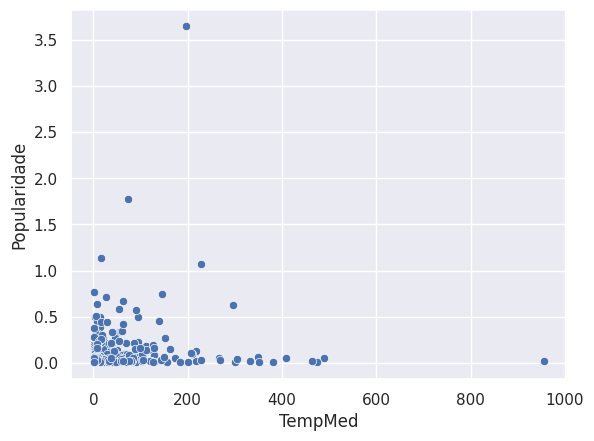

In [4]:
sns.scatterplot(x=games_df['TempMed'], y=games_df['Popularidade']);

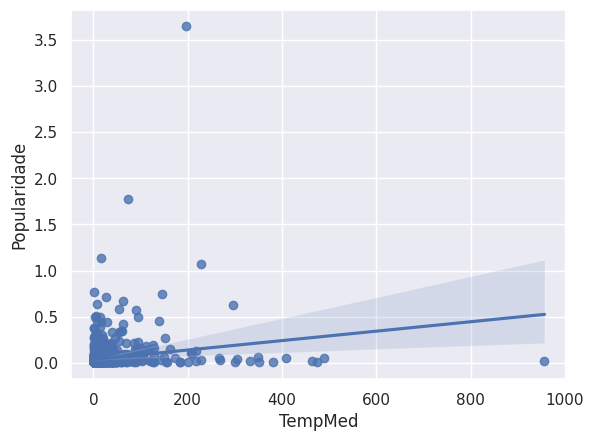

In [5]:
sns.regplot(x=games_df['TempMed'], y=games_df['Popularidade']);

In [6]:
resultA = reg.linear(data=games_df, formula='Popularidade ~ TempMed')
resultA.micro_summary()

variable,coefficient,std error,p-value
TempMed,0.000510,0.000062,0.000000


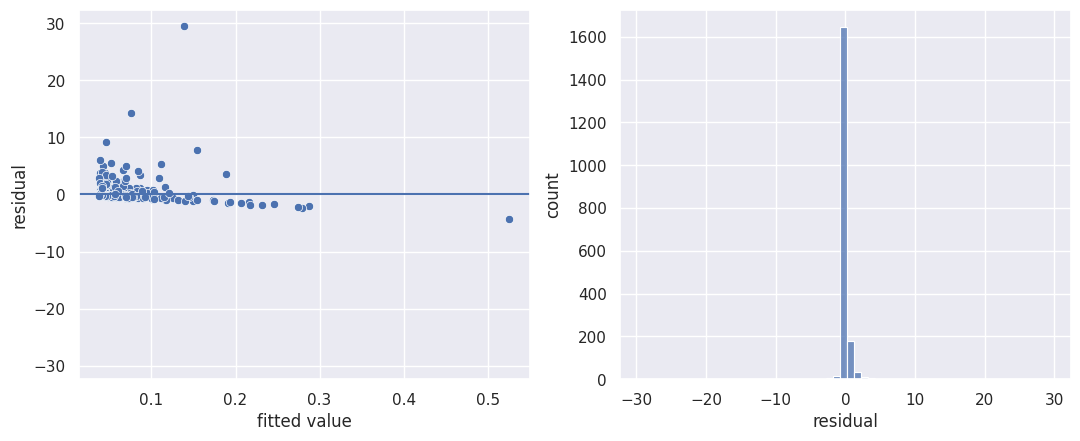

In [7]:
resultA.plot_residuals()

In [8]:
resultA2 = reg.linear(data=games_df, formula='np.log(Popularidade) ~ np.log(TempMed)')
resultA2.micro_summary()

variable,coefficient,std error,p-value
np.log(TempMed),0.256510,0.014680,0.000000


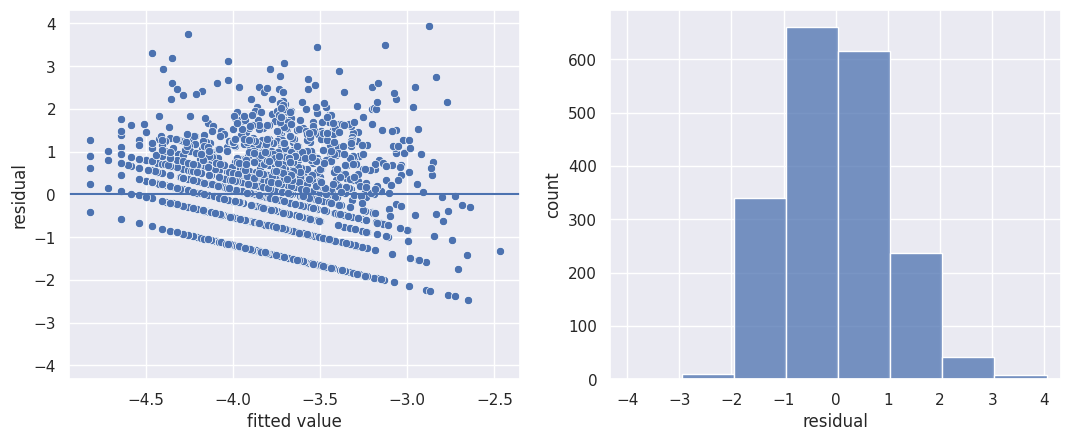

In [9]:
resultA2.plot_residuals()

## MODELO B

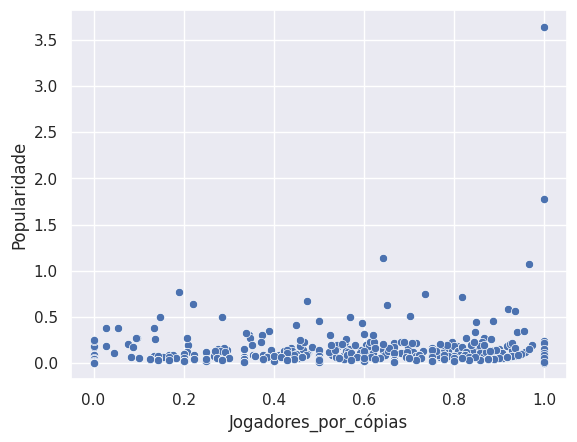

In [10]:
sns.scatterplot(x=games_df['Jogadores_por_cópias'], y=games_df['Popularidade']);

In [11]:
resultB = reg.linear(data=games_df, formula='Popularidade ~ Jogadores_por_cópias')
resultB.micro_summary()

variable,coefficient,std error,p-value
Jogadores_por_cópias,0.018598,0.004461,0.000031


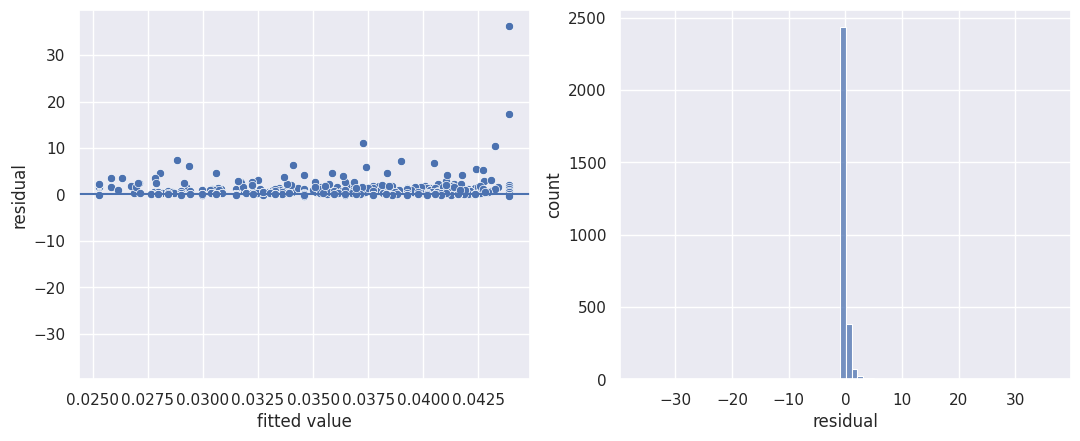

In [12]:
resultB.plot_residuals()

In [248]:
resultB2 = reg.linear(data=games_df, formula='np.power(np.log(Popularidade),2) ~ np.power(np.log(Jogadores_por_cópias+1)+1,-0.5)')
resultB2.micro_summary()

variable,coefficient,std error,p-value
"np.power(np.log(Jogadores_por_cópias + 1) + 1, -0.5)",17.505247,1.524446,0.000000


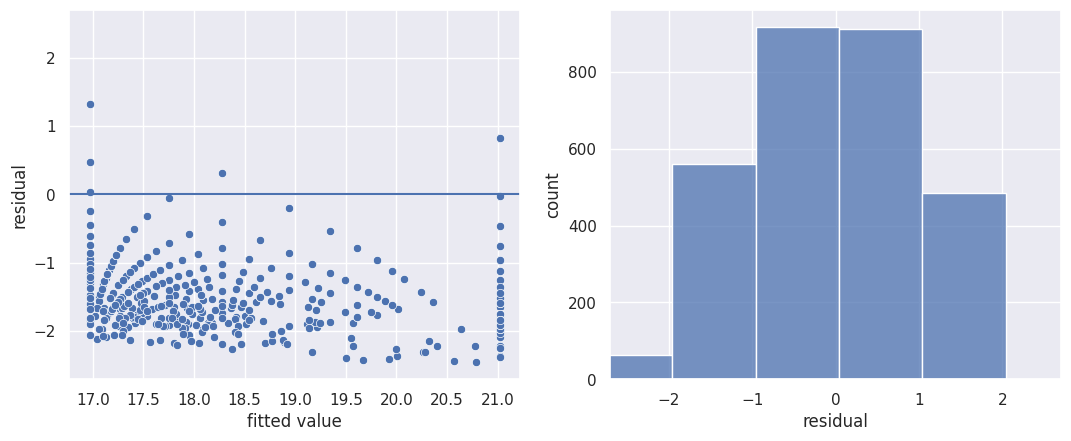

In [249]:
resultB2.plot_residuals()

## MODELO C

In [15]:
resultC = reg.linear(data=user_df, formula='clustering ~ total_hours_played + games_played')
resultC.micro_summary()

variable,coefficient,std error,p-value
total_hours_played,-0.074542,0.035814,0.037647
games_played,-0.000387,0.000260,0.137281


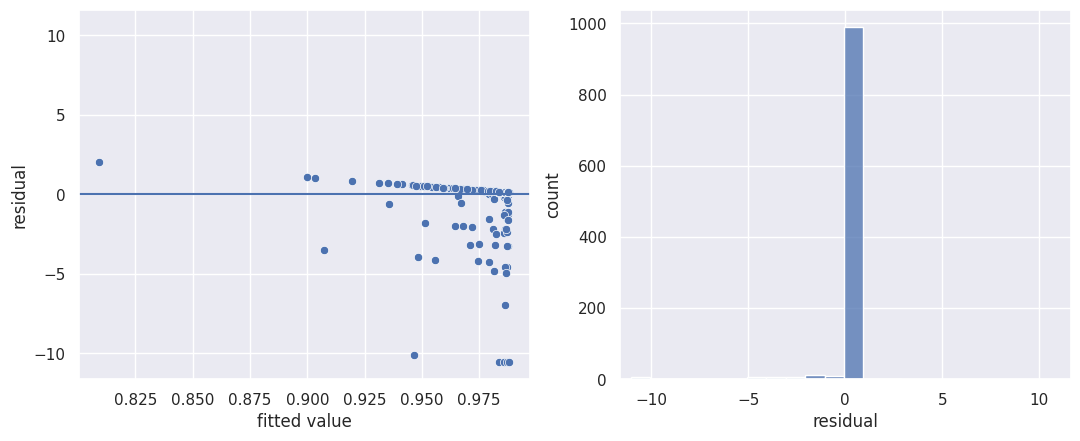

In [16]:
resultC.plot_residuals()

In [555]:
resultC2 = reg.linear(data=user_df, formula='np.log1p(clustering) ~ (total_hours_played) + np.log(games_played)')
resultC2.micro_summary()

variable,coefficient,std error,p-value
total_hours_played,0.003134,0.023304,0.893061
np.log(games_played),-0.010748,0.002282,0.000003


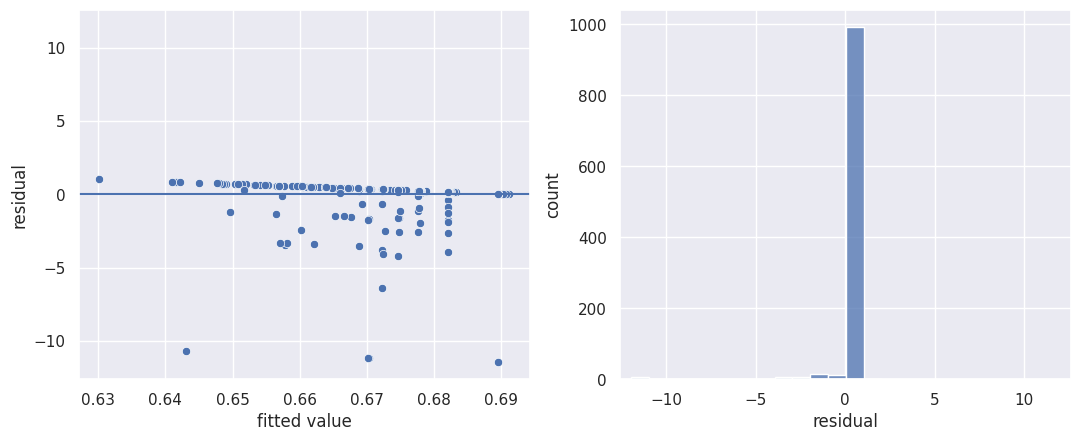

In [556]:
resultC2.plot_residuals()

## MODELO D

In [19]:
resultD = reg.linear(data=games_df, formula="Popularidade ~ TempMed + Jogadores_por_cópias")
resultD.micro_summary()

variable,coefficient,std error,p-value
TempMed,0.000538,0.000062,0.000000
Jogadores_por_cópias,-0.049927,0.009740,0.000000


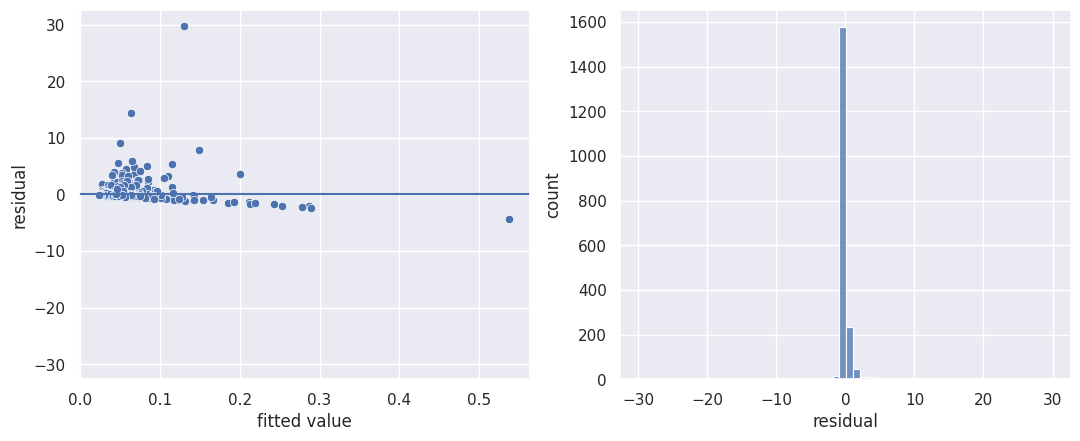

In [20]:
resultD.plot_residuals()

In [21]:
resultD2 = reg.linear(data=games_df, formula="np.log(Popularidade) ~ np.log(TempMed) + np.log(Jogadores_por_cópias +1)")
resultD2.micro_summary()

variable,coefficient,std error,p-value
np.log(TempMed),0.297545,0.012698,0.000000
np.log(Jogadores_por_cópias + 1),-3.194942,0.122243,0.000000


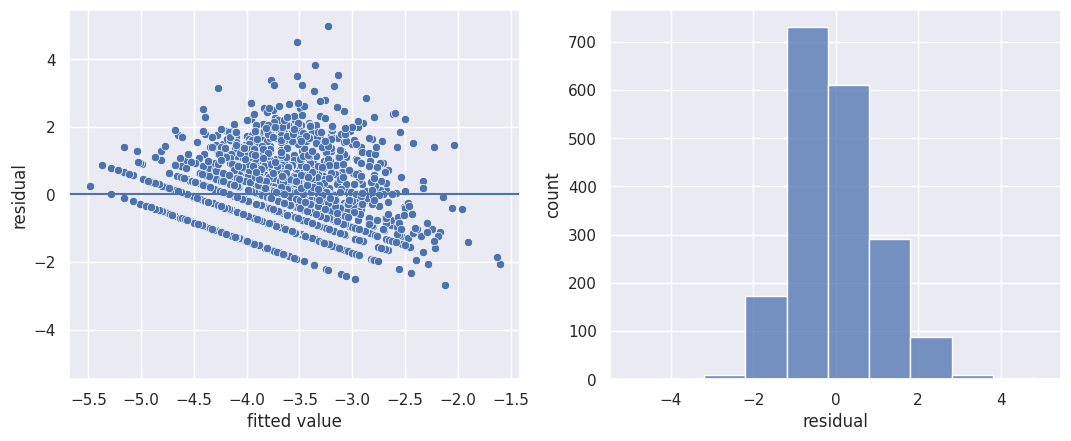

In [22]:
resultD2.plot_residuals()